In [1]:
import pandas as pd
import re
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.pyplot import figure
import wordcloud
from sklearn.preprocessing import OneHotEncoder
import matplotlib.animation as animation
sns.set()

In [2]:
tokens = pd.read_csv('All Data/Raw Journey Data/TokensUntil16May2020.csv')

In [3]:
topics = pd.read_csv('All Data/Raw Journey Data/Entry_topics_Until16May2020.csv')
datadf = pd.read_csv(r'All Data/Raw Journey Data/Until16May2020(all jsons to csv).csv')

In [4]:
datadf = datadf.set_index('id')
datadf

,text,date_modified,date_journal,address,lat,lon,mood,timezone,favourite,weather,photos,tags,no_punc,is_personal,cleaned_text
id,,,,,,,,,,,,,,,
1439137473084-3fc756cc3f8d6404,"The first thing I saw ,when I entered her room...",2017-08-31 01:44:57,2015-08-09 11:24:33,NaN,1.7976931348623157e+308,1.7976931348623157e+308,0,NaN,False,"{'id': -1, 'degree_c': 1.7976931348623157e+308...",[],"['personal', 'published']",The first thing I saw when I entered her room ...,1,"The first thing I saw , when I entered her roo..."
1439198245820-3fda14add91e3f20,Philosophy\n\n\n\n\n\n\nIt surprises me..hw u ...,2017-08-22 22:08:05,2015-08-10 04:17:25,NaN,1.7976931348623157e+308,1.7976931348623157e+308,0,NaN,False,"{'id': -1, 'degree_c': 1.7976931348623157e+308...",[],['personal'],Philosophy It surprises me hw u so effortlessl...,1,Philosophy It surprises me ... hw you so effor...
1439198461993-3fefd6db711e0342,Me \n\n\nWrite fantasies/inaginary dream world...,2017-10-08 12:24:49,2015-08-10 04:21:01,NaN,1.7976931348623157e+308,1.7976931348623157e+308,0,NaN,False,"{'id': -1, 'degree_c': 1.7976931348623157e+308...",[],['me'],Me Write fantasies inaginary dream world stori...,0,Me Write fantasies / inaginary dream world sto...
1439575035515-3feb330512548cbd,"The dwarfs garden\n\nHe had a garden ,that lit...",2016-04-29 05:23:44,2015-08-14 12:57:15,NaN,1.7976931348623157e+308,1.7976931348623157e+308,0,NaN,False,"{'id': -1, 'degree_c': 1.7976931348623157e+308...",[],['published'],The dwarfs garden He had a garden that little ...,0,"The dwarfs garden He had a garden , that littl..."
1440393646546-3fdb2bc02b9f8020,Brigadier Suraj singh\n\nMy name is brigadier ...,2017-08-18 05:27:31,2015-08-24 00:20:46,NaN,1.7976931348623157e+308,1.7976931348623157e+308,0,NaN,False,"{'id': -1, 'degree_c': 1.7976931348623157e+308...",[],['script'],Brigadier Suraj singh My name is brigadier sur...,0,Brigadier Suraj singh My name is brigadier sur...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1589599203833-3fccc2487ff20d88,"<p dir=""auto"">That I really work well with int...",2020-05-15 22:20:45,2020-05-15 22:20:04,"412 Cedar Crest, Coppell, TX 75019, USA",32.97098234,-96.98031213,1,America/Chicago,False,"{'id': 0, 'degree_c': 19.4, 'description': 'Ov...",[],['personal'],That I really work well with introverts and pr...,1,That I really work well with introverts and pr...
1589599469199-3fc8b4cdb6d4b0d4,"<p dir=""auto""><span>Jodi Thor Dak Shoone Ko Na...",2020-05-15 22:49:11,2020-05-15 22:24:29,"412 Cedar Crest, Coppell, TX 75019, USA",32.97098234,-96.98031213,1,America/Chicago,False,"{'id': 0, 'degree_c': 19.4, 'description': 'Ov...",[],['personal'],Jodi Thor Dak Shoone Ko Na Ashi Tobe Ekla Chol...,1,Jodi Thor Dak Shoone Ko Na Ashi Tobe Ekla Chol...
1589603430128-3fdcc9774f183676,"<p dir=""auto"">It's really been a while since I...",2020-05-15 23:31:03,2020-05-15 23:30:30,"412 Cedar Crest, Coppell, TX 75019, USA",32.97098234,-96.98031213,1,America/Chicago,False,"{'id': 0, 'degree_c': 19.4, 'description': 'Li...",[],['personal'],It s really been a while since I ve told a gir...,1,it is really been a while since I have told a ...


In [5]:
#1 - generic?
#2 - nyu professional 
#3 - nyu friends
#4 - 
#5 - India
#6 - philosophy, generic life statements
#7 - book?
#8 - hindi
#9 - ibd stuff
#10 - would, could? 
#11 - book stuff
#12 - France, french
#13 - all girls, crush stuff
#14 - people, others...
#15 - blind man, short film, short stories

In [6]:
def top_docs (topic_num, how_many):
    temp = topics[topics['topic']==topic_num].sort_values(by='gamma', ascending=False)
    ids = list(temp.document[0:how_many].values)
#     print(datadf.cleaned_text[ids])
    return(datadf.loc[ids])
#     print(ids)
    

In [16]:
top_docs(10,10)

,text,date_modified,date_journal,address,lat,lon,mood,timezone,favourite,weather,photos,tags,no_punc,is_personal,cleaned_text
id,,,,,,,,,,,,,,,
1515011079931-3fd8f6f3a37a77e8,\nThis section of the book being the most rece...,2018-01-04 13:48:07,2018-01-03 14:24:39,"Road no.10, Vishrantwadi Airport Rd, Adarsh Co...",18.57489651,73.89353628,1,NaN,False,"{'id': 0, 'degree_c': 16.5, 'description': 'Cl...",[],['book'],This section of the book being the most recent...,0,This section of the book being the most recent...
1499078747411-3fcca82b0bc30a00,A very impulsive; raw and real emotion-filled ...,2018-06-02 08:29:34,2017-07-03 05:45:47,Lane Number 10,18.57486996,73.89341416,6,NaN,False,"{'id': 0, 'degree_c': 27.6, 'description': 'Cl...",[],"['personal', 'book']",A very impulsive raw and real emotion filled l...,1,A very impulsive ; raw and real emotion - fill...
1507621010130-3fb5f3988134d380,Free fall\n\nIt was field trip day for VitaeTe...,2017-12-30 04:50:48,2017-10-10 02:36:50,"163/2C/1, Vishrantwadi Airport Rd, Adarsh Colo...",18.5724506,73.8931759,1,NaN,False,"{'id': 0, 'degree_c': 23.9, 'description': 'Ha...",['1507621010130-3fb5f3988134d380-3fdb04ff9bd3d...,['published'],Free fall It was field trip day for VitaeTech ...,0,Free fall It was field trip day for VitaeTech ...
1439137473084-3fc756cc3f8d6404,"The first thing I saw ,when I entered her room...",2017-08-31 01:44:57,2015-08-09 11:24:33,NaN,1.7976931348623157e+308,1.7976931348623157e+308,0,NaN,False,"{'id': -1, 'degree_c': 1.7976931348623157e+308...",[],"['personal', 'published']",The first thing I saw when I entered her room ...,1,"The first thing I saw , when I entered her roo..."
1473515832730-3fe3b6dd2bd05251,". Doing engineering, following up with an MBA ...",2016-10-07 04:38:59,2016-09-10 08:57:12,NaN,1.7976931348623157e+308,1.7976931348623157e+308,1,NaN,False,"{'id': -1, 'degree_c': 1.7976931348623157e+308...",[],['script'],Doing engineering following up with an MBA and...,0,". Doing engineering , following up with an MBA..."
1521443618859-3fb508b6ff93f228,# A very impulsive; raw and real emotion-fille...,2018-06-02 08:32:14,2017-07-03 05:45:00,"10, Vishrantwadi Airport Rd, Adarsh Colony, Dh...",18.5748891,73.8934913,0,NaN,False,"{'id': 0, 'degree_c': 23.2, 'description': 'Br...",[],['book'],A very impulsive raw and real emotion filled l...,0,# A very impulsive ; raw and real emotion - fi...
1514653384141-3fc4567fa3733648,There are only two times I remember crying in ...,2017-12-30 11:40:20,2017-12-30 11:03:04,"Road no.10, Vishrantwadi Airport Rd, Adarsh Co...",18.57482251,73.89362943,1,NaN,False,"{'id': 0, 'degree_c': 18.3, 'description': 'Cl...",[],['book'],There are only two times I remember crying in ...,0,There are only two times I remember crying in ...
1502279445126-3f8ced5446547300,It took me 20 years to build the Taj Mahal....,2017-08-09 09:07:47,2017-08-09 06:50:45,Lane Number 10,18.5749273,73.8933327,0,NaN,False,"{'id': 0, 'degree_c': 28.5, 'description': 'Ov...",[],['unpublished'],It took me 20 years to build the Taj Mahal It ...,0,It took me 20 years to build the Taj Mahal . I...
1495541446967-3fe08fb04aa22814,Ponds of Paint. \n\nThere were more than a hun...,2017-11-23 13:00:20,2017-05-23 07:10:46,"Chemin des Trois-Pieds, 84460 Cheval-Blanc, Fr...",43.78548409,5.06056574,1,NaN,False,"{'id': 0, 'degree_c': 27.3, 'description': 'Cl...",[],['unpublished'],Ponds of Paint There were more than a hundred ...,0,Ponds of Paint . There were more than a hundre...


In [26]:
datadf['cleaned_text'].loc['1495541446967-3fe08fb04aa22814']

"Ponds of Paint . There were more than a hundred ponds in the world . All vibrant yet monochromatic . A hundred different colours of thick paint . Similar shaded ponds always neighboured one another . There was a whole cluster of 13 different shades of black alone . Helvetica black . Coal black . Jet black ... You know ? Also ... There were people . People who inhabited separate colours . And can you guess what the main occupation for the whole world was ? Well fishing ofcourse ! Humans lived on tiny boats and carried , always , long fishing rods . Lababa and Libibi were a cute fishermen couple who were both born in Purple . Lababa was from Poison purple whereas Libibi was from Grape purple . Ironically ... Lababa's family had agreed to the marriage immediately while Libibi's side was very sour . Talk about confusing names . Lababa and Labibi both loved to travel . This is how they had come to meet infact . There had been a barbeque party in Fire Red and they were both good friends wit

In [74]:
documents = topics.reset_index().iloc[topics.groupby(['document']).gamma.idxmax().values].drop(columns = 'index')

In [75]:
timedata = pd.read_csv('All Data/Raw Journey Data/TimeDataUntil16May2020.csv')
documents = datadf.merge(documents, left_on='id', right_on='document', how='left')[['is_personal','topic','document']]
documents = timedata.merge(documents, left_on='id', right_on='document')
documents

,id,date_journal,year,month,day,hour,minute,dayofweek,day_num,month_num,month_name,year_month,minute_of_day,is_personal,topic,document
0,1439137473084-3fc756cc3f8d6404,2015-08-09 11:24:33,2015,8,9,11,24,6,0,0,aug,2015 aug,684,1,10.0,1439137473084-3fc756cc3f8d6404
1,1439198245820-3fda14add91e3f20,2015-08-10 04:17:25,2015,8,10,4,17,0,1,0,aug,2015 aug,257,1,6.0,1439198245820-3fda14add91e3f20
2,1439198461993-3fefd6db711e0342,2015-08-10 04:21:01,2015,8,10,4,21,0,1,0,aug,2015 aug,261,0,2.0,1439198461993-3fefd6db711e0342
3,1439575035515-3feb330512548cbd,2015-08-14 12:57:15,2015,8,14,12,57,4,5,0,aug,2015 aug,777,0,9.0,1439575035515-3feb330512548cbd
4,1440393646546-3fdb2bc02b9f8020,2015-08-24 00:20:46,2015,8,24,0,20,0,15,0,aug,2015 aug,20,0,5.0,1440393646546-3fdb2bc02b9f8020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2481,1589599203833-3fccc2487ff20d88,2020-05-15 22:20:04,2020,5,15,22,20,4,1741,57,may,2020 may,1340,1,14.0,1589599203833-3fccc2487ff20d88
2482,1589599469199-3fc8b4cdb6d4b0d4,2020-05-15 22:24:29,2020,5,15,22,24,4,1741,57,may,2020 may,1344,1,8.0,1589599469199-3fc8b4cdb6d4b0d4
2483,1589603430128-3fdcc9774f183676,2020-05-15 23:30:30,2020,5,15,23,30,4,1741,57,may,2020 may,1410,1,13.0,1589603430128-3fdcc9774f183676
2484,1589648755507-3fb1780bc86a8890,2020-05-16 12:05:55,2020,5,16,12,5,5,1742,57,may,2020 may,725,1,1.0,1589648755507-3fb1780bc86a8890


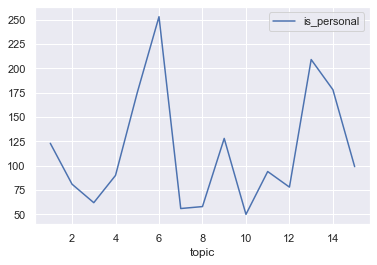

In [70]:
documents.groupby('topic').agg({'is_personal':'sum'}).plot()

In [72]:
# topic 6 and 13 are overwhelmingly filled with personal thought logs, while 10 is predominantly not personal

In [76]:
documents.groupby('hour').topic.counts()

AttributeError: 'SeriesGroupBy' object has no attribute 'counts'